# Load dataset

In [1]:
import pandas as pd

data = pd.read_csv('insurance.csv')

In [2]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Plots

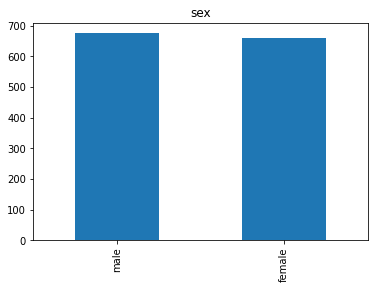

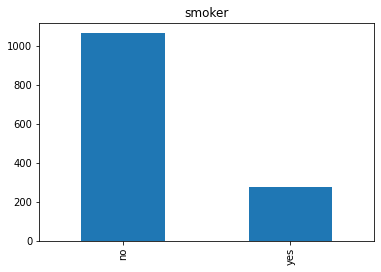

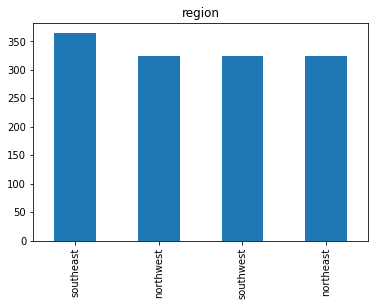

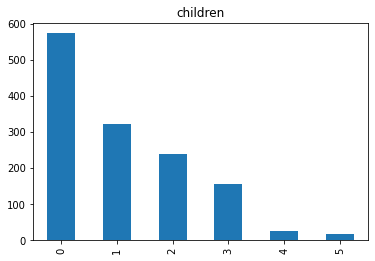

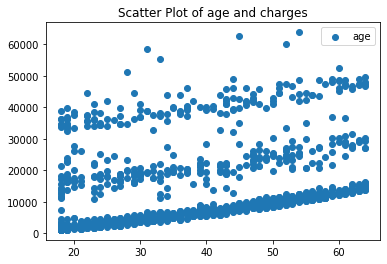

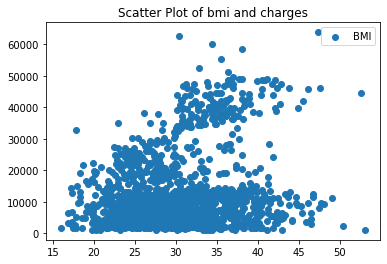

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

variables = ['sex','smoker','region','children']

for v in variables:
    data = data.sort_values(by=[v])
    data[v].value_counts().plot(kind = 'bar')
    plt.title(v)
    plt.show()
    
plt.scatter(data['age'], data.charges,label='age')
plt.title('Scatter Plot of age and charges')
plt.legend()
plt.show()
plt.scatter(data['bmi'], data.charges,label="BMI")
plt.title('Scatter Plot of bmi and charges')
plt.legend()
plt.show()

# Label encoding

In [4]:
sex = {'male': 1,'female': 0}
data.sex = [sex[item] for item in data.sex]

smoker = {'yes': 1,'no': 0}
data.smoker = [smoker[item] for item in data.smoker]

region = {'northeast': 1,'southeast': 2,'southwest': 3,'northwest': 4}
data.region = [region[item] for item in data.region]

X= data.iloc[:, :-1].values
y= data.iloc[:,-1].values

In [5]:
data.head()

,age,sex,bmi,children,smoker,region,charges
478,21,1,36.85,0,0,2,1534.3045
759,18,1,38.17,0,1,2,36307.7983
1228,56,1,34.43,0,0,2,10594.2257
915,24,0,33.99,0,0,2,2473.3341
181,18,0,38.28,0,0,2,1631.8212


In [6]:
data.shape

(1338, 7)

In [7]:
data.info

<bound method DataFrame.info of       age  sex    bmi  children  smoker  region      charges
478    21    1  36.85         0       0       2   1534.30450
759    18    1  38.17         0       1       2  36307.79830
1228   56    1  34.43         0       0       2  10594.22570
915    24    0  33.99         0       0       2   2473.33410
181    18    0  38.28         0       0       2   1631.82120
...   ...  ...    ...       ...     ...     ...          ...
1272   43    1  25.52         5       0       2  14478.33015
425    45    1  24.31         5       0       2   9788.86590
438    52    0  46.75         5       0       2  12592.53450
71     31    1  28.50         5       0       1   6799.45800
1085   39    0  18.30         5       1       3  19023.26000

[1338 rows x 7 columns]>

In [8]:
print(X.shape)
print(y.shape)

(1338, 6)
(1338,)


# Splitting the dataset into the Training set and Test set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0) 

In [10]:
len(X_train)

1070

In [11]:
len(X_test)

268

# Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Random Forest Regressor model

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

regressor = RandomForestRegressor(n_estimators = 1000,random_state = 0)
regressor.fit(X_train, y_train)

regressor.score(X_train,y_train)

0.9772232627945463

In [14]:
import numpy as np

y_pred = regressor.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[12287.6657256   7345.7266    ]
 [ 6776.41104537  2219.4451    ]
 [11836.15321454  9875.6804    ]
 [15651.85067579 11013.7119    ]
 [16073.7603964  12244.531     ]
 [53189.65741423 38998.546     ]
 [15461.11682342  9504.3103    ]
 [ 5553.06787663  3861.20965   ]
 [16316.18355101 16085.1275    ]
 [11398.84694284 11552.904     ]
 [ 5849.94177512  5484.4673    ]
 [45586.93221601 44641.1974    ]
 [ 6270.92396816  5425.02335   ]
 [ 4466.5214913   3201.24515   ]
 [ 6680.14242262  5855.9025    ]
 [ 7404.88392644  3537.703     ]
 [ 8257.86233563  6079.6715    ]
 [ 3349.16507507 21595.38229   ]
 [ 8781.2506678   7196.867     ]
 [ 8273.08031882  7731.4271    ]
 [ 9691.60975627  9095.06825   ]
 [41157.27374719 41097.16175   ]
 [ 5552.80219507 19442.3535    ]
 [11949.29342725 10085.846     ]
 [17313.1336114  12829.4551    ]
 [ 7013.09636231  3994.1778    ]
 [18966.54055461 27941.28758   ]
 [ 3181.9873328   2731.9122    ]
 [48639.75121783 48673.5588    ]
 [ 3509.45225564  3736.4647    ]
 [49077.99

In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse=mean_squared_error(y_test,y_pred)
rmse=mean_squared_error(y_test,y_pred,squared=False)

print('MSE = ' ,mse)
print('RMSE = ' ,rmse)
print('R-Square score =' ,r2_score(y_test,y_pred))

MSE =  21814259.46305214
RMSE =  4670.5737830647895
R-Square score = 0.8425236734529715


In [16]:
# Predict charges for new customer
data = {'age' : 40,
        'sex' : 2,
        'bmi' : 45.50,
        'children' : 4,
        'smoker' : 1,
        'region' : 3}
index = [1]
df = pd.DataFrame(data,index)
df

,age,sex,bmi,children,smoker,region
1,40,2,45.5,4,1,3


In [17]:
prediction_df = regressor.predict(df)
print("Medical Insurance cost for new customer is : ",prediction_df)

Medical Insurance cost for new customer is :  [57965.23007876]
